In [242]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

In [243]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [244]:
df = pd.read_csv('C:/Netology/netflix_titles.csv', na_values='NaN')

In [245]:
print(df.shape)

(6234, 12)


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [247]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [248]:
#найдем типы кино встречаемы в датасете

types = list(set(list(df.type)))
types

['TV Show', 'Movie']

In [249]:
res={}
for el in types:
    res[el] = list(df.type).count(el)  #подсчет количества вхождений в датасет
res

{'TV Show': 1969, 'Movie': 4265}

## Выведем гистраграмму сравнения количества фильмов и сериалов в датасете Netflix

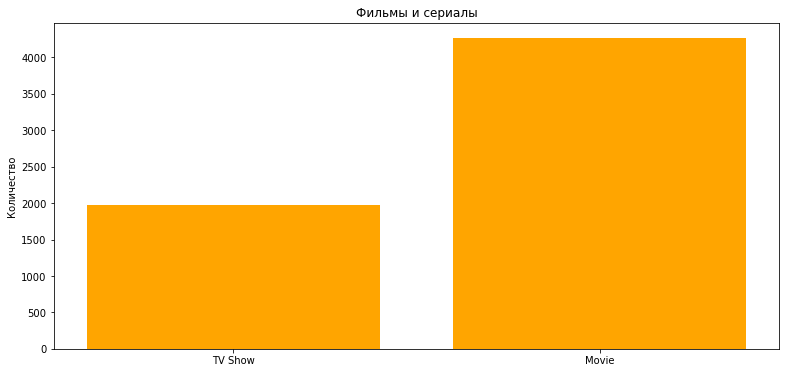

In [250]:
# выведем гистаграмму сравнивающую количество фильмов с количеством сериалов в датасете

x=list(res.keys())
y=list(res.values())
plt.subplot()
plt.bar(x, y, color='orange')
plt.title('Фильмы и сериалы')
plt.ylabel('Количество')
plt.show()

In [251]:
table_content = pd.DataFrame()
table_content = pd.concat([table_content, pd.DataFrame([res])]).T
table_content.reset_index().head()

,index,0
0,TV Show,1969
1,Movie,4265


In [252]:
table_content.rename(columns={0:'Количество'}, inplace=True)
table_content

,Количество
TV Show,1969
Movie,4265


## Выведем круговую диаграмму сравнения количества фильмов и сериалов в датасете Netflix

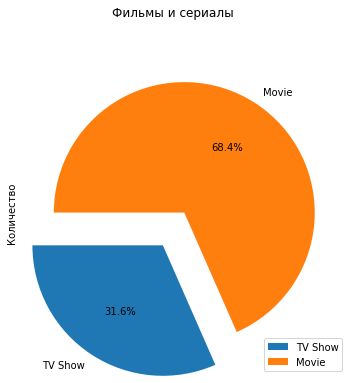

In [253]:
ax = table_content.plot(kind='pie', title='Фильмы и сериалы', subplots=True, explode=[0.3, 0], autopct='%1.1f%%', startangle=180)

In [254]:
list_genres = list(df.listed_in)

all_genres=[]    #список всех жанров в датасете
for index in range(len(list_genres)):
    if type(list_genres[index])!= float:
        if list_genres[index].find(','):
            all_genres.extend(list_genres[index].split(', '))
        else:
            all_genres.extend(list_genres[index])
        
len(all_genres)

13670

In [257]:
res_2={}
for el in all_genres:
    res_2[el] = all_genres.count(el)  #подсчет количества вхождений каждого жанра в общий список жанров
res_2

{'Children & Family Movies': 378,
 'Comedies': 1113,
 'Stand-Up Comedy': 281,
 "Kids' TV": 328,
 'Crime TV Shows': 363,
 'International TV Shows': 1001,
 'Spanish-Language TV Shows': 117,
 'International Movies': 1927,
 'Sci-Fi & Fantasy': 193,
 'Thrillers': 392,
 'Docuseries': 279,
 'Science & Nature TV': 67,
 'Action & Adventure': 597,
 'Dramas': 1623,
 'Cult Movies': 55,
 'Independent Movies': 552,
 'Romantic Movies': 376,
 'Documentaries': 668,
 'Horror Movies': 262,
 'Romantic TV Shows': 278,
 'TV Comedies': 436,
 'TV Dramas': 599,
 'TV Thrillers': 44,
 'TV Mysteries': 69,
 'British TV Shows': 210,
 'Music & Musicals': 243,
 'Reality TV': 153,
 'TV Action & Adventure': 126,
 'Anime Features': 45,
 'Teen TV Shows': 44,
 'Faith & Spirituality': 47,
 'Korean TV Shows': 132,
 'Anime Series': 117,
 'LGBTQ Movies': 60,
 'TV Horror': 54,
 'Movies': 56,
 'Stand-Up Comedy & Talk Shows': 42,
 'TV Sci-Fi & Fantasy': 68,
 'Classic Movies': 84,
 'Sports Movies': 157,
 'TV Shows': 10,
 'Classic

In [256]:
our_table_genres = pd.DataFrame()
our_table_genres = pd.concat([our_table_genres, pd.DataFrame([res_2])]).T
our_table_genres.reset_index().head(5)

,index,0
0,Children & Family Movies,378
1,Comedies,1113
2,Stand-Up Comedy,281
3,Kids' TV,328
4,Crime TV Shows,363


In [259]:
our_table_genres.rename(columns={0:'Количество'}, inplace=True)
our_table_genres.head()

,Количество
Children & Family Movies,378
Comedies,1113
Stand-Up Comedy,281
Kids' TV,328
Crime TV Shows,363


In [260]:
TOP_10_genre = our_table_genres.sort_values('Количество', ascending=False).head(10)
TOP_10_genre.head(10)

,Количество
International Movies,1927
Dramas,1623
Comedies,1113
International TV Shows,1001
Documentaries,668
TV Dramas,599
Action & Adventure,597
Independent Movies,552
TV Comedies,436
Thrillers,392


In [262]:
TOP_10_genre.index

Index(['International Movies', 'Dramas', 'Comedies', 'International TV Shows',
       'Documentaries', 'TV Dramas', 'Action & Adventure',
       'Independent Movies', 'TV Comedies', 'Thrillers'],
      dtype='object')

In [265]:
TOP_10_genre['Количество']

International Movies      1927
Dramas                    1623
Comedies                  1113
International TV Shows    1001
Documentaries              668
TV Dramas                  599
Action & Adventure         597
Independent Movies         552
TV Comedies                436
Thrillers                  392
Name: Количество, dtype: int64

## Выведем гистраграмму ТОП-10 жанров   в датасете Netflix

[Text(0, 0, 'International Movies'),
 Text(1, 0, 'Dramas'),
 Text(2, 0, 'Comedies'),
 Text(3, 0, 'International TV Shows'),
 Text(4, 0, 'Documentaries'),
 Text(5, 0, 'TV Dramas'),
 Text(6, 0, 'Action & Adventure'),
 Text(7, 0, 'Independent Movies'),
 Text(8, 0, 'TV Comedies'),
 Text(9, 0, 'Thrillers')]

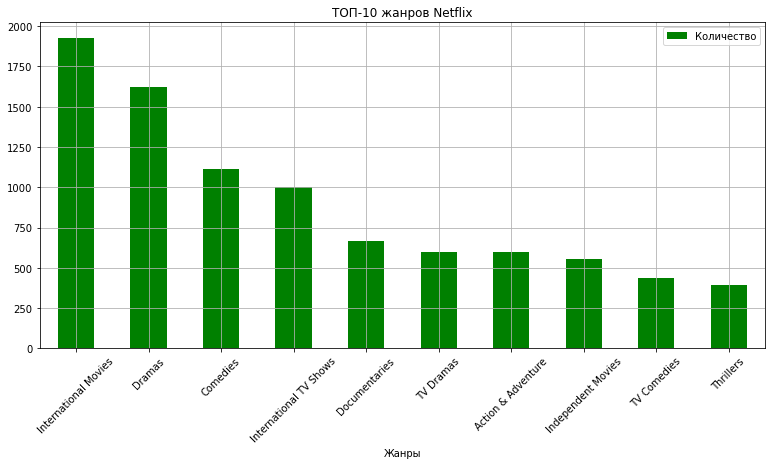

In [266]:
chart = TOP_10_genre.plot(kind='bar', xlabel='Жанры', title='ТОП-10 жанров Netflix', color='g')
chart.grid()
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [267]:
list_countries = list(df.country)

all_countries=[]    #список всех стран-производителей киноконтента в датасете
for index in range(len(list_countries)):
    if type(list_countries[index])!= float:
        if list_countries[index].find(','):
            all_countries.extend(list_countries[index].split(', '))
        
print(len(all_countries))

7179


In [268]:
res_3={}
for el in all_countries:
    res_3[el] = all_countries.count(el)  #подсчет количества вхождений каждой страны в общий список стран
res_3

{'United States': 2609,
 'India': 838,
 'South Korea': 162,
 'China': 120,
 'United Kingdom': 601,
 'Spain': 178,
 'Bulgaria': 8,
 'Canada': 318,
 'Chile': 23,
 'Denmark': 38,
 'Sweden': 33,
 'Netherlands': 37,
 'Belgium': 66,
 'France': 271,
 'Uruguay': 9,
 'United States,': 1,
 'Thailand': 56,
 'Pakistan': 23,
 'Turkey': 87,
 'Brazil': 66,
 'Italy': 67,
 'Indonesia': 52,
 'Ireland': 33,
 'Hong Kong': 97,
 'Morocco': 6,
 'Mexico': 129,
 'Vietnam': 4,
 'Argentina': 68,
 'Nigeria': 36,
 'Japan': 231,
 'Germany': 151,
 'Greece': 8,
 'Norway': 21,
 'Switzerland': 15,
 'United Arab Emirates': 21,
 'Lebanon': 9,
 'Cambodia': 3,
 'Russia': 21,
 'Poland': 26,
 'Israel': 26,
 'Australia': 126,
 'Portugal': 4,
 'Egypt': 54,
 'Taiwan': 75,
 'Austria': 10,
 'Czech Republic': 15,
 'Senegal': 2,
 'Soviet Union': 3,
 'Peru': 9,
 'Ukraine': 3,
 'Malaysia': 21,
 'South Africa': 30,
 'Nepal': 2,
 'Philippines': 47,
 'Serbia': 5,
 'Colombia': 36,
 'Singapore': 30,
 'Luxembourg': 7,
 'West Germany': 5,
 

In [269]:
our_table_countries = pd.DataFrame()
our_table_countries = pd.concat([our_table_countries, pd.DataFrame([res_3])]).T
our_table_countries.head()

,0
United States,2609
India,838
South Korea,162
China,120
United Kingdom,601


In [270]:
our_table_countries.rename(columns={0:'Количество'}, inplace=True)
our_table_countries.head()

,Количество
United States,2609
India,838
South Korea,162
China,120
United Kingdom,601


In [271]:
TOP_5_countries = our_table_countries.sort_values('Количество', ascending=False).head(5)
TOP_5_vs2 = TOP_5_countries.sort_values('Количество', ascending=True)
TOP_5_vs2.head()

,Количество
France,271
Canada,318
United Kingdom,601
India,838
United States,2609


## Выведем гистраграмму ТОП-5 стран-производителей  фильмов и сериалов в датасете Netflix

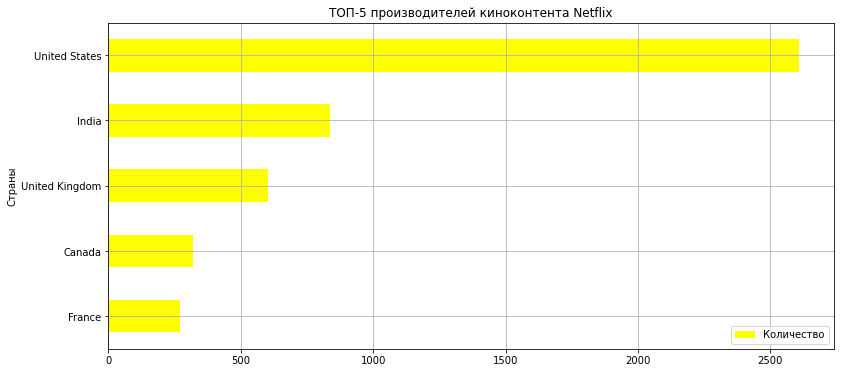

In [272]:
chart_2 = TOP_5_vs2.plot(kind='barh', xlabel='Страны', color='yellow', title='ТОП-5 производителей киноконтента Netflix')
chart_2.grid()

In [273]:
#найдем жанры кино и сериалов встречаемы в датасете

genres = np.array([], dtype=str)
for l in df['listed_in']:
    genres = np.append(genres, l.split(', '))

In [274]:
genres = np.unique(genres)
genres

array(['Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies',
       'Classic & Cult TV', 'Classic Movies', 'Comedies',
       'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries',
       'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies',
       'International TV Shows', "Kids' TV", 'Korean TV Shows',
       'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV',
       'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy',
       'Science & Nature TV', 'Spanish-Language TV Shows',
       'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows',
       'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror',
       'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers',
       'Teen TV Shows', 'Thrillers'], dtype='<U28')

In [275]:
for genre in genres:
    df[genre] = 0
    for index, listed_in in enumerate(df['listed_in']):
        if genre in listed_in:
            df.loc[index, genre] = 1

In [276]:
pd.unique(df['release_year'])

array([2019, 2016, 2013, 2017, 2014, 2015, 2009, 2012, 2010, 2018, 2011,
       2004, 2000, 1983, 1982, 2006, 2005, 2002, 1997, 2008, 2007, 2003,
       1981, 1991, 1994, 1988, 1976, 1973, 1974, 1989, 1986, 1984, 1978,
       1998, 1972, 1979, 1960, 1959, 2001, 1995, 1992, 1990, 1975, 1985,
       1980, 1970, 1996, 1967, 1999, 1987, 1968, 1993, 2020, 1958, 1965,
       1956, 1962, 1955, 1977, 1945, 1946, 1942, 1944, 1947, 1943, 1969,
       1954, 1966, 1971, 1964, 1925, 1963], dtype=int64)

In [277]:
df_genres = pd.DataFrame({'year': pd.unique(df['release_year'])})
for genre in genres:
    df_genres[genre] = 0
    gb = df.groupby(['release_year'])[genre].sum()
    for index in range(len(df_genres)):
        df_genres.loc[index, genre] = gb[df_genres.loc[index, 'year']]
df_genres = df_genres.set_index('year')

In [278]:
df_genres

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
year,,,,,,,,,,,,,,,,,,,,,
2019,74,2,19,28,49,2,0,201,89,0,...,42,106,139,20,23,22,269,15,17,58
2016,74,4,7,29,43,2,0,176,41,1,...,9,45,73,4,6,4,172,2,4,64
2013,24,4,5,11,21,1,0,61,9,2,...,2,11,19,0,1,0,46,1,0,14
2017,83,4,9,36,41,1,0,207,64,1,...,8,65,85,5,13,6,186,4,5,64
2014,23,2,6,7,21,0,0,74,11,0,...,3,14,22,2,1,4,56,1,2,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1971,1,0,0,0,1,0,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1964,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## График развития жанров за последние 10 лет

<ipython-input-279-362d88d568a8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gb = df.loc[df['release_year'] > 2010 ].groupby(['release_year'])[genre].sum()


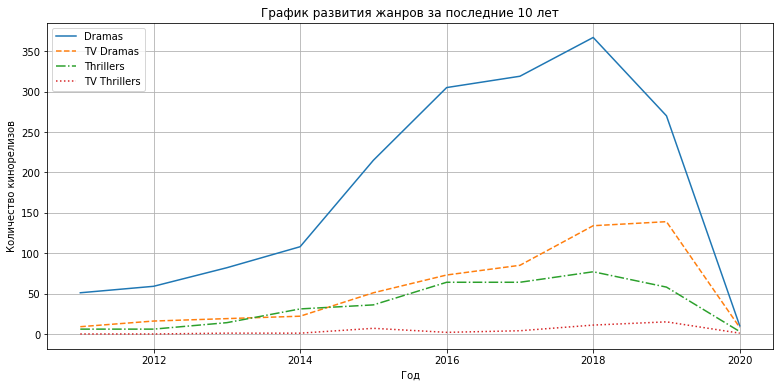

In [279]:
genre = 'Dramas', 'TV Dramas', 'Thrillers', 'TV Thrillers' 
gb = df.loc[df['release_year'] > 2010 ].groupby(['release_year'])[genre].sum()
x = gb.index
y1 = gb['Dramas']
y2 = gb['TV Dramas']
y3 = gb['Thrillers']
y4 = gb['TV Thrillers']
plt.plot(x, y1, label=genre[0])
plt.plot(x, y2, '--', label=genre[1])
plt.plot(x, y3, '-.', label=genre[2])
plt.plot(x, y4, ':', label=genre[3])
plt.title('График развития жанров за последние 10 лет')
plt.xlabel('Год')
plt.ylabel('Количество кинорелизов')
plt.grid()
plt.legend(loc='upper left')
plt.show()

## Комментарий:
### Мы можем указать и сравнить любые интересующение нас жанры, в зависимости от наших целей и интересов

## Вывод:
1. Мы можем изучить наполняемость Netflix, распределение киноконтента (фильмы, сериалы)
2. Посмотреть графики развития киножанров на Netflix, с момента первого появления и до актуальных дней
3. Посмотреть страны в контексте количества кинопроизводства (снятых фильмов и сериалов)
Все это может помочь поставить цели по наполняемости контекта и выстраиванию направления развития, в зависимости от ТОП стран по производству контента, ТОП жанров киноконтента, развитие индустрии.